# AI-Powered Pipeline Anomaly Detection

This notebook demonstrates how Isolation Forest can detect abnormal ingestion patterns
in data engineering pipelines using historical row count metrics.

Author: Naveen Donthula
Stack: Python | Databricks | scikit-learn

## Problem Statement

Traditional monitoring relies on static thresholds:
- Alert if row_count > X
- Alert if row_count < Y

However, real enterprise pipelines have dynamic patterns.

This notebook demonstrates:
- Synthetic ingestion data generation
- Anomaly detection using Isolation Forest
- Visualization of abnormal behavior

In [0]:
# Configuration
MEAN_ROW_COUNT = 50000
STD_DEV = 2000
DAYS = 30
CONTAMINATION_RATE = 0.05

# Generate Data Cleanly

In [0]:
import numpy as np
import pandas as pd

np.random.seed(42)

normal_data = np.random.normal(
    loc=MEAN_ROW_COUNT,
    scale=STD_DEV,
    size=DAYS
)

anomalies = [200000, 5000]

data = np.append(normal_data, anomalies)

df = pd.DataFrame({
    "day": range(1, len(data)+1),
    "row_count": data
})

df.head()

,day,row_count
0,1,50993.428306
1,2,49723.471398
2,3,51295.377076
3,4,53046.059713
4,5,49531.693251


## Applying Isolation Forest

Isolation Forest isolates anomalies by randomly partitioning data.
Outliers require fewer splits and are detected efficiently.

In [0]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    contamination=CONTAMINATION_RATE,
    random_state=42
)

df["anomaly"] = model.fit_predict(df[["row_count"]])

# Visualization

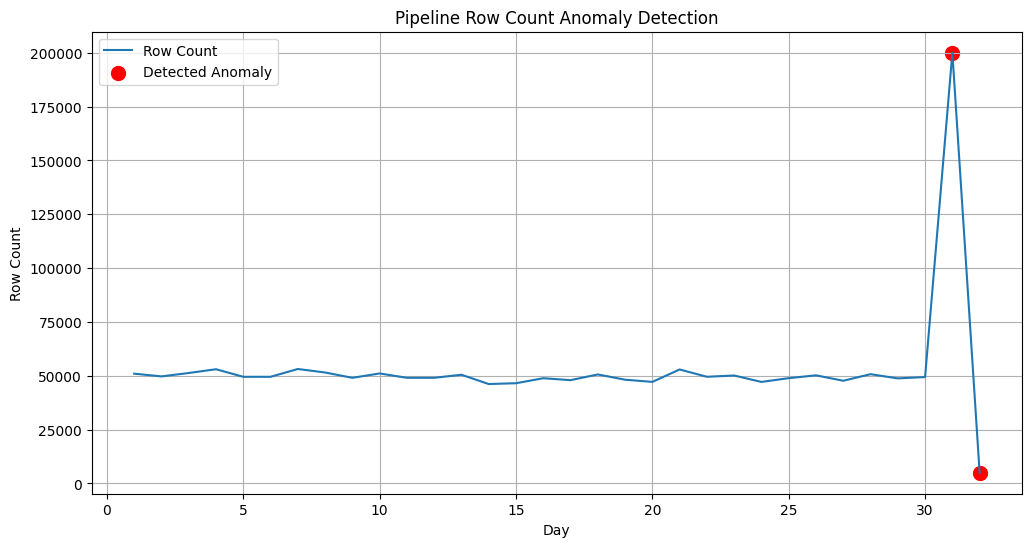

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df["day"], df["row_count"], label="Row Count")

plt.scatter(
    df[df["anomaly"] == -1]["day"],
    df[df["anomaly"] == -1]["row_count"],
    color="red",
    label="Detected Anomaly",
    s=100
)

plt.title("Pipeline Row Count Anomaly Detection")
plt.xlabel("Day")
plt.ylabel("Row Count")
plt.legend()
plt.grid(True)
plt.show()

## How This Would Work in Production (Azure)

1. ADF logs row_count and runtime metrics into a Delta table.
2. A scheduled Databricks job runs daily.
3. Isolation Forest detects anomalies.
4. Results written to anomaly_alert table.
5. Logic App triggers notification if anomaly detected.

This transforms static monitoring into intelligent pipeline health detection.